# Introduction

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL has an exclusive window in ICC Future Tours Programme

# Problem Statement

Find out the most successful teams, players and factors
contributing win or loss of a team.

### Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df1=pd.read_csv("matches.csv")
df2=pd.read_csv("deliveries.csv")

In [3]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN



### Data Cleaning

In [6]:
df1.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
df2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [8]:
df1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [9]:
df2.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [10]:
df1['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [11]:
df1.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
df1.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
df1.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
df1.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)

In [12]:
df2.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
df2.batting_team.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
df2.bowling_team.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)

In [15]:
df1.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [17]:
df1.replace('Bangalore','Bengaluru',inplace=True)

In [18]:
df1.venue.unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [19]:
df1.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

In [26]:
### filling Missing values
df1.city.fillna(df1['venue'],inplace=True)
df1.winner.fillna(df1['result'],inplace=True)
df1.umpire1.fillna('unknown',inplace=True)
df1.umpire2.fillna('unkonown',inplace=True)
df1.umpire3.fillna('unknown',inplace=True)
df1.player_of_match.fillna('unknown',inplace=True)

### Total Number of matches till 2019 

([<matplotlib.axis.YTick at 0x1caa52d0400>,
 <a list of 12 Text major ticklabel objects>)

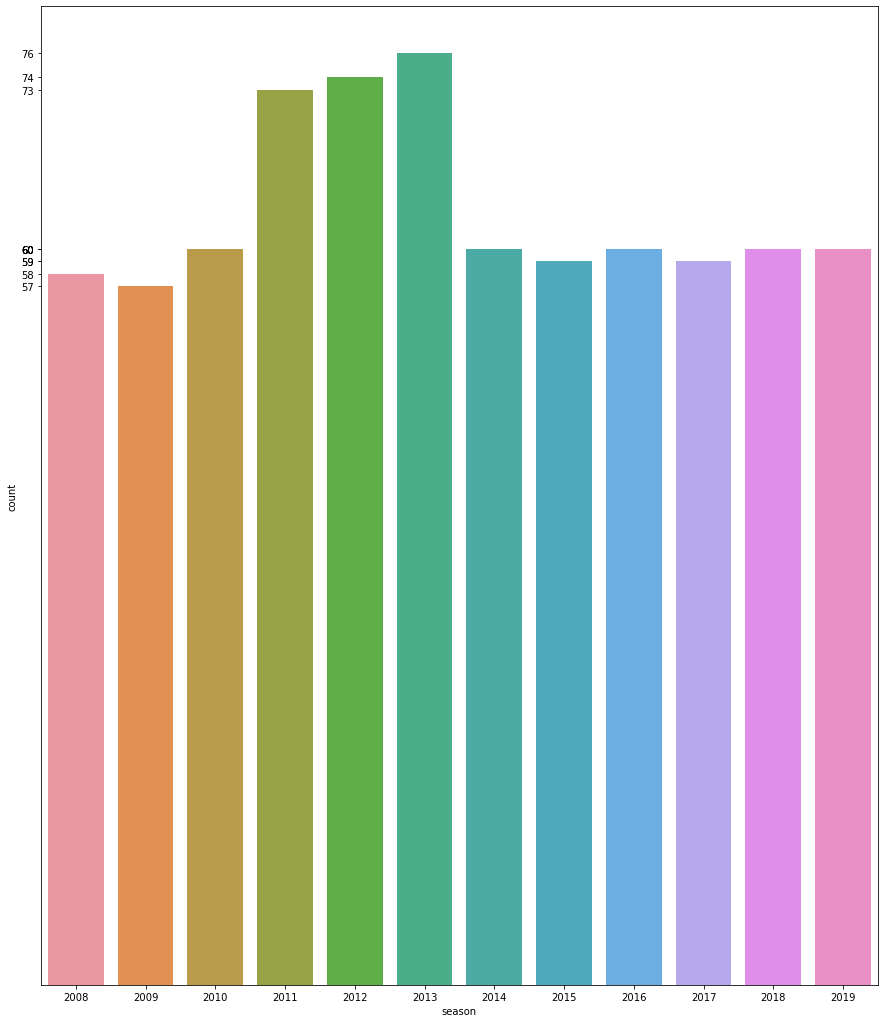

In [50]:
plt.figure(figsize=(15,18))
sns.countplot(df1['season'])
plt.yticks(ticks=df1['season'].value_counts(),label=df1['season'].value_counts())

In [57]:
""" from above graph we conclude how many matches played in a season

2008-58 matches       
2009-57 matches       
2010-60 matches 
2011-73 matches
2012-74 matches 
2013-76 matches
2014-60 matches
2015-59 matches
2016-60 matches
2017-59 matches
2018-60 matches
2019-60 matches
"""

' from above graph we know how many matches played in a season\n\n2008-58 matches       \n2009-57 matches       \n2010-60 matches \n2011-73 matches\n2012-74 matches \n2013-76 matches\n2014-60 matches\n2015-59 matches\n2016-60 matches\n2017-59 matches\n2018-60 matches\n2019-60 matches\n'

### Total number of matches win by each team

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

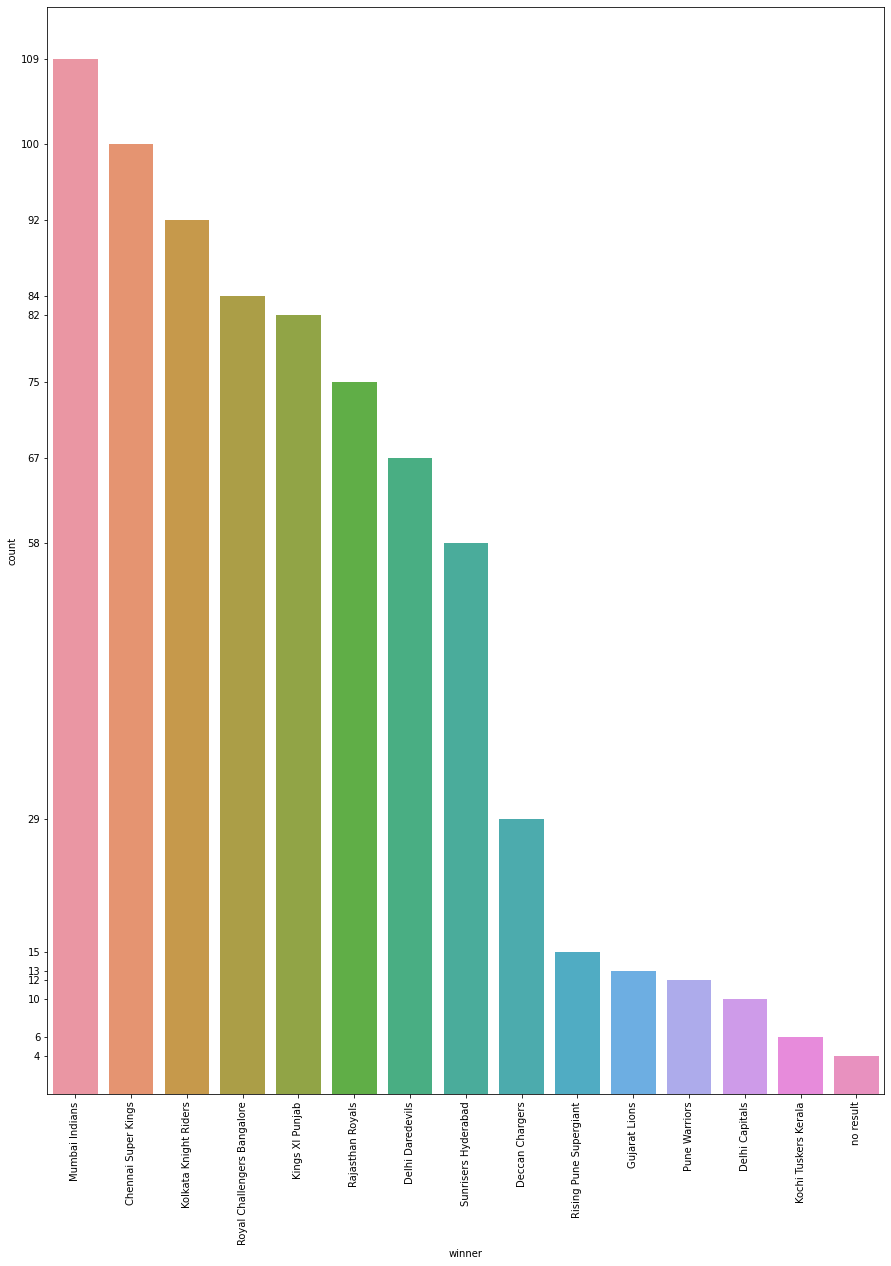

In [115]:
plt.figure(figsize=(15,20))
sns.countplot(df1['winner'],order=pd.value_counts(df1['winner']).index)
plt.yticks(ticks=df1['winner'].value_counts(),rotation=0)
plt.xticks(rotation=90)

Mumbai has most wins followed by Chennai and than Kolkata.

### Toss Winner

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

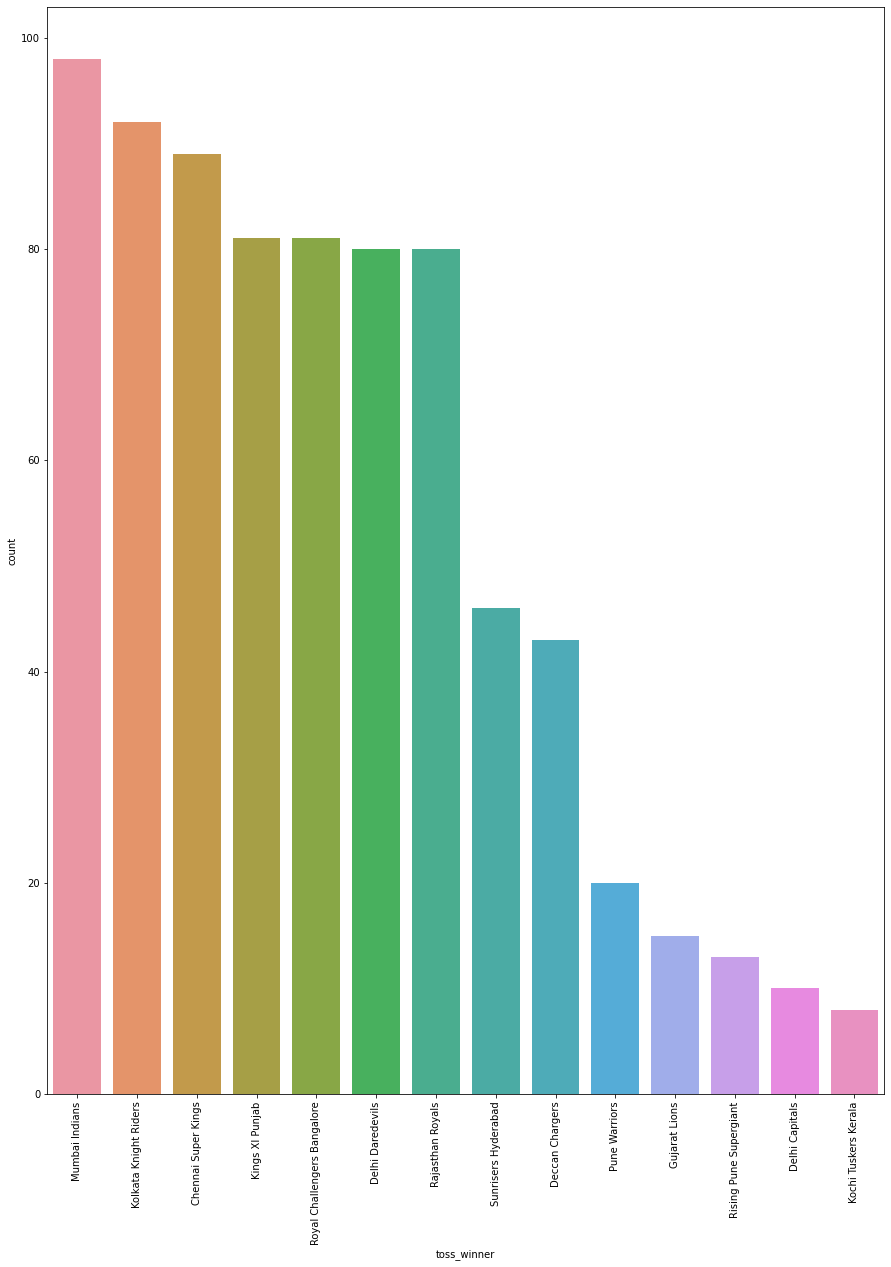

In [114]:
plt.figure(figsize=(15,20))
sns.countplot(df1['toss_winner'],order=pd.value_counts(df1['toss_winner']).index)
plt.xticks(rotation=90)

Again it's Mumbai who's winning the toss more often

### Toss decision


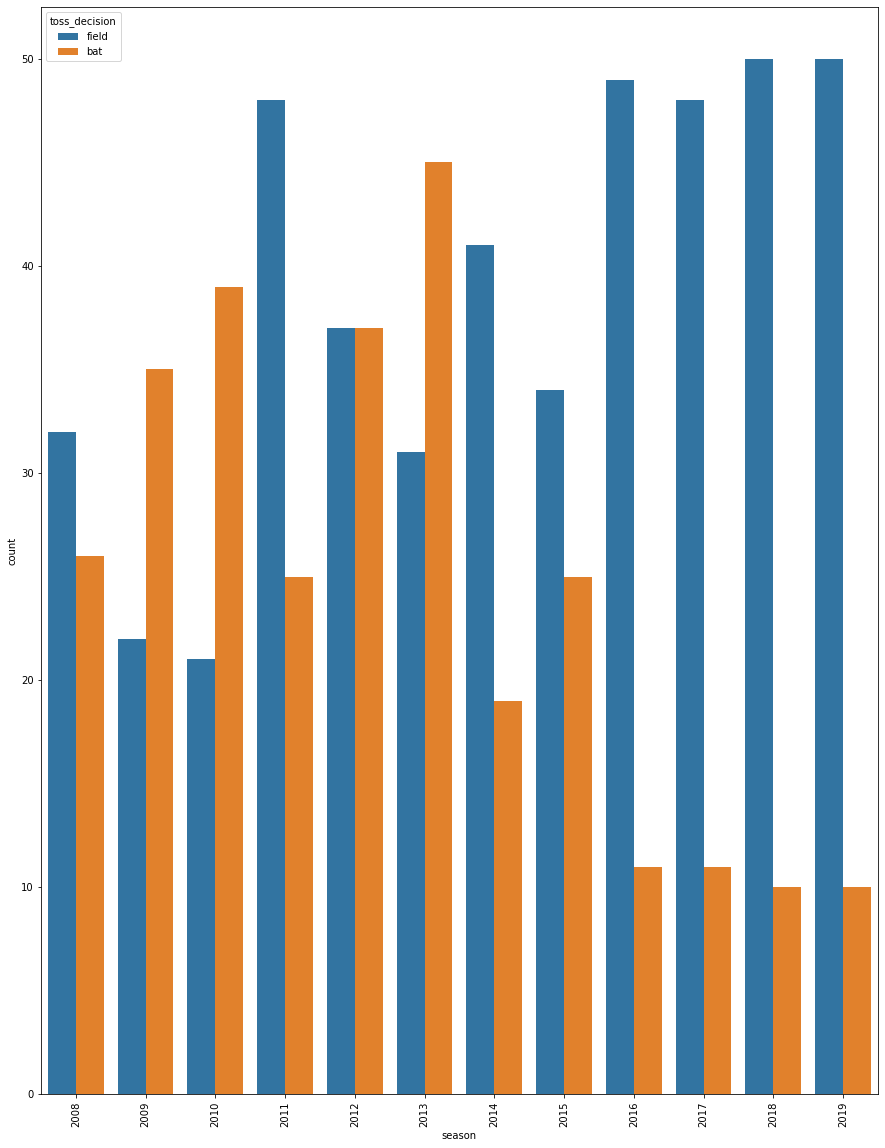

In [110]:
plt.subplots(figsize=(15,20))
sns.countplot(x=df1['season'],hue=df1['toss_decision'])
plt.xticks(rotation=90)
plt.show()

Teams used to bat first after winning the toss during initial years of IPL. But we see there's a clear change in this pattern, specially last couple of years.

# Venue

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text major ticklabel objects>)

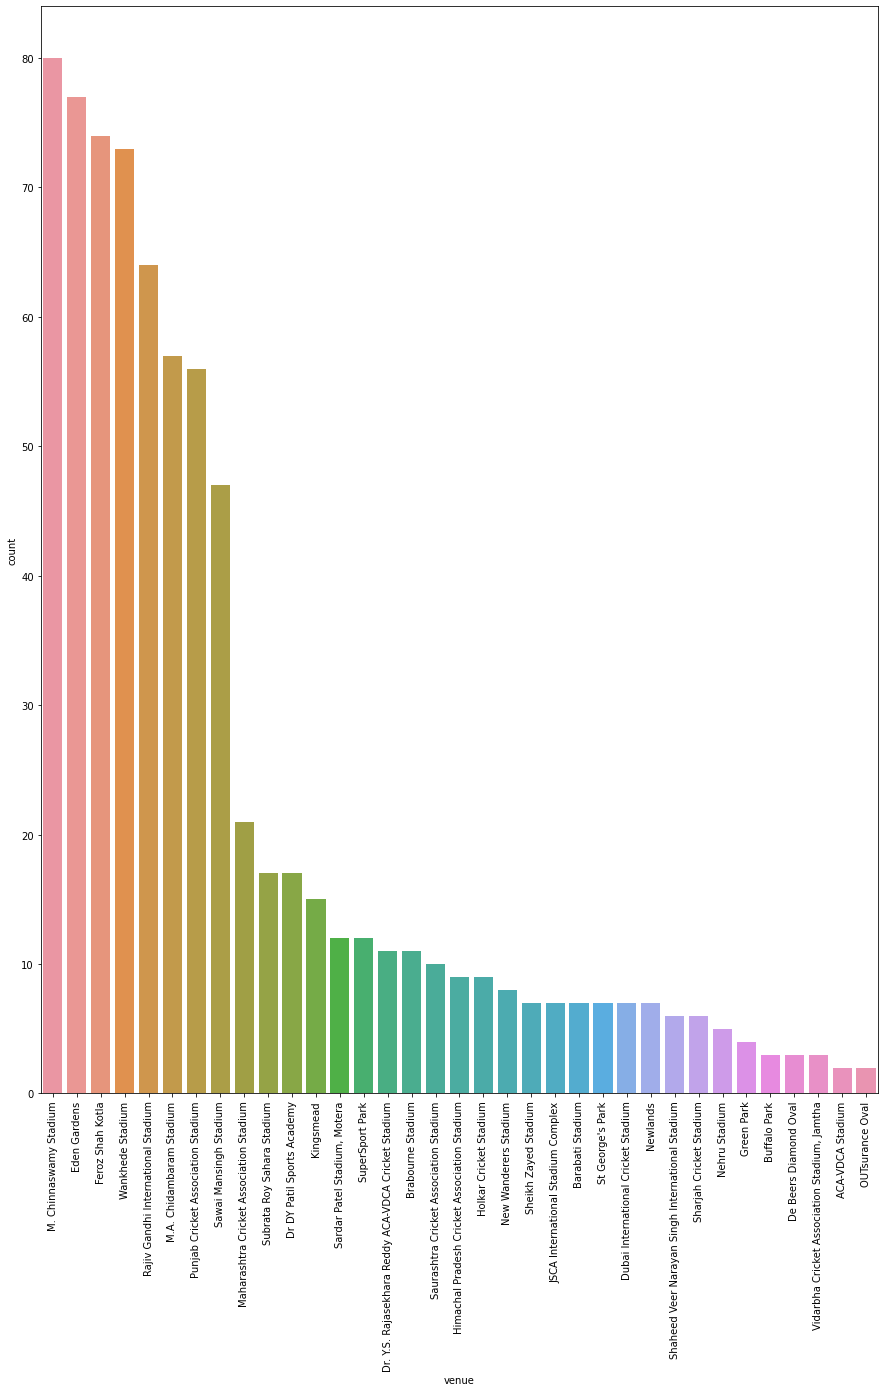

In [118]:
plt.figure(figsize=(15,20))
sns.countplot(df1['venue'],order=pd.value_counts(df1['venue']).index)
plt.xticks(rotation=90)

Big cities with a home team have hosted more matches with M Chinnaswamy Stadium leading till 2019 followed by Eden Gardens and Feroz Shah Kotla

# Player Level Analysis

In [121]:
batting_tot=df2.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10]
print('The Top 10 Batsmen in the Tournament are:\n',top_batsmen)

The Top 10 Batsmen in thr Tournament are:
             batsman  Runs
486         V Kohli  5434
428        SK Raina  5415
367       RG Sharma  4914
112       DA Warner  4741
392        S Dhawan  4632
92         CH Gayle  4560
290        MS Dhoni  4477
384      RV Uthappa  4446
26   AB de Villiers  4428
147       G Gambhir  4223


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

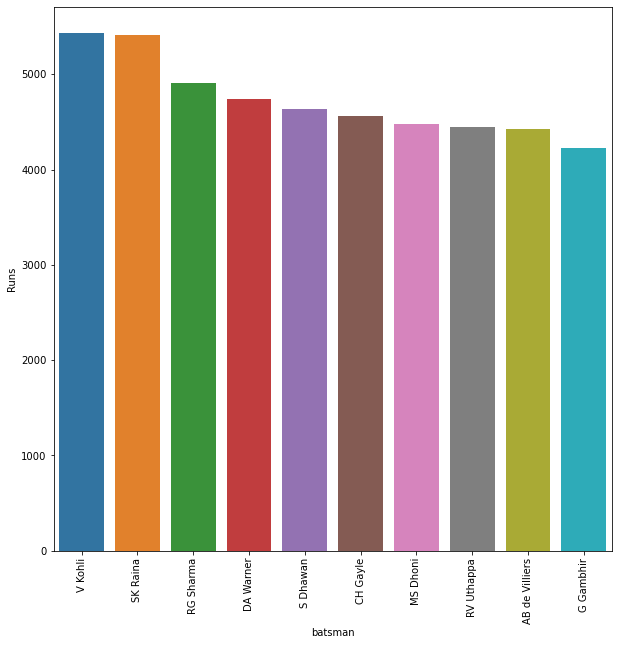

In [161]:
plt.figure(figsize=(10,10))
sns.barplot( x='batsman', y='Runs',data=top_batsmen)
plt.xticks(rotation=90)
            

 Virat Kohli and Suresh Raina- The top Scoring Batsmen in the IPL History

In [162]:
bowling_wickets=df2[df2['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
print('The Top Wicket Takers in the Tournament are:\n',top_bowlers)


The Top Wicket Takers in the Tournament are:
               bowler  Wickets
290       SL Malinga      170
6           A Mishra      156
110  Harbhajan Singh      150
227        PP Chawla      149
82          DJ Bravo      147
46           B Kumar      133
232         R Ashwin      125
296        SP Narine      122
326         UT Yadav      119
244        RA Jadeja      108


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

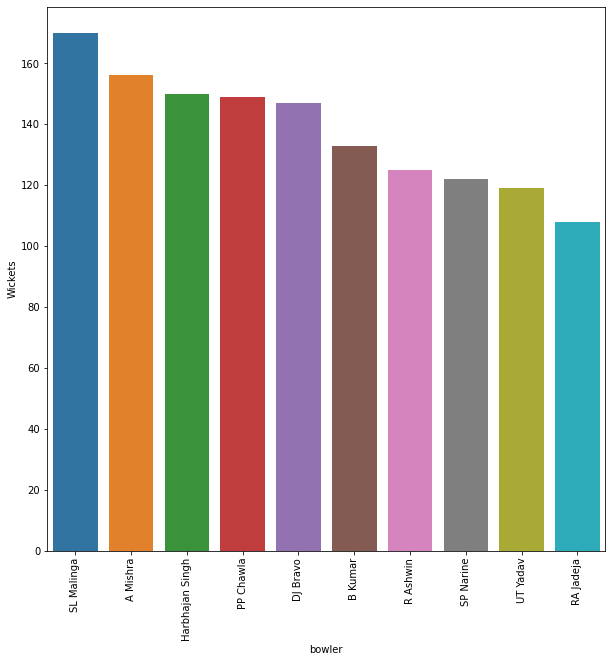

In [164]:
plt.figure(figsize=(10,10))
sns.barplot( x='bowler', y='Wickets',data=top_bowlers)
plt.xticks(rotation=90)

Lasith Malinga- The highest wicket Taker in IPL

In [168]:
fielder_list=df2.groupby('fielder').apply(lambda x:x).dropna().reset_index()
fielder_list_count=fielder_list.groupby('fielder').count()
fielder_list_counts=fielder_list_count['dismissal_kind'].reset_index(name='Dismissals')
fielder_list_max=fielder_list_counts.sort_values(by='Dismissals',ascending=False)
top_fielders=fielder_list_max[0:10]
print('The Best Fielders(and WicketKeepers) in the Torunament are:\n',top_fielders)

The Best Fielders(and WicketKeepers) in the Torunament are:
             fielder  Dismissals
279        MS Dhoni         159
206      KD Karthik         152
372      RV Uthappa         125
412        SK Raina         115
19   AB de Villiers         114
313        PA Patel          97
355       RG Sharma          92
470         V Kohli          90
200      KA Pollard          85
484         WP Saha          82


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

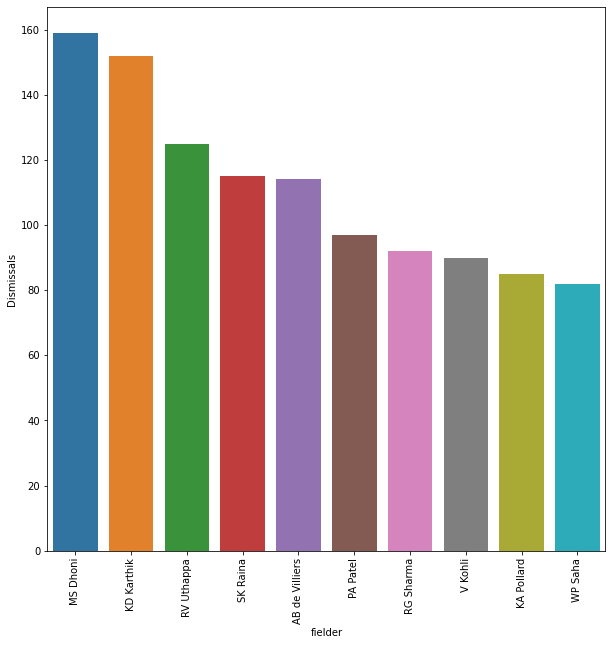

In [169]:
plt.figure(figsize=(10,10))
sns.barplot( x='fielder', y='Dismissals',data=top_fielders)
plt.xticks(rotation=90)

Mahendra Singh Dhoni- the player having most dismissals under his name in IPL

In [173]:
Target_run=1000
batting_tot=df2.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batsman_balls_faced=df2.groupby('batsman').count()
batsman_balls_faced_count=batsman_balls_faced['ball'].reset_index(name='Balls Faced')
batsman_runs_balls=pd.merge(batting_tot,batsman_balls_faced_count,left_on='batsman',right_on='batsman',how='outer')
batsman_strike_rate=batsman_runs_balls.groupby(['batsman','Runs']).apply(lambda x:((x['Runs'])/(x['Balls Faced']))*100).reset_index(name='Strike Rate')
batsman_strike_rate_list=batsman_strike_rate.sort_values(by='Strike Rate',ascending=False)
batsman_strike_rate_above_target_runs=batsman_strike_rate_list[batsman_strike_rate_list['Runs']>=Target_run]
top_strike_rate_batsman=batsman_strike_rate_above_target_runs.loc[:,['batsman','Runs','Strike Rate']][0:10]
print('The Top 10 batsmen having highest strike rate, scoring atleast {} Runs:\n'.format(Target_run),top_strike_rate_batsman)


The Top 10 batsmen having highest strike rate, scoring atleast 1000 Runs:
             batsman  Runs  Strike Rate
34       AD Russell  1445   179.950187
374         RR Pant  1792   162.318841
153      GJ Maxwell  1403   155.543237
163       HH Pandya  1118   151.902174
189      JC Buttler  1431   150.000000
488        V Sehwag  2728   148.827059
26   AB de Villiers  4428   148.740343
92         CH Gayle  4560   145.640370
213      KA Pollard  2784   141.751527
112       DA Warner  4741   139.523249


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

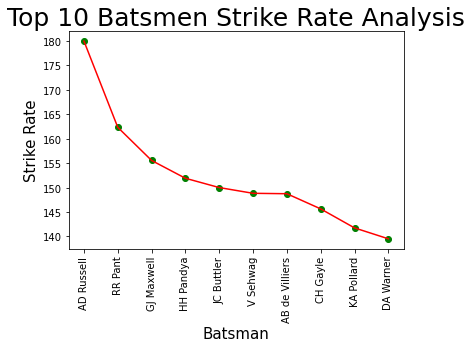

In [175]:
plt.plot(top_strike_rate_batsman['batsman'],top_strike_rate_batsman['Strike Rate'],color='r')
plt.scatter(top_strike_rate_batsman['batsman'],top_strike_rate_batsman['Strike Rate'],color='g')
plt.xlabel('Batsman',size=15)
plt.ylabel('Strike Rate',size=15)
plt.title('Top 10 Batsmen Strike Rate Analysis',size=25)
plt.xticks(rotation=90)

Andre Russel- The Player with the best strike rate overall

In [176]:
Ball_Limit=1000
bowling_runs=df2.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls=df2.groupby('bowler').count()
bowled_balls=bowling_balls['ball'].reset_index(name='Balls Bowled')
bowler_stats=pd.merge(bowling_runs,bowled_balls,left_on='bowler',right_on='bowler',how='outer')
bowler_economy_rate=bowler_stats.groupby(['bowler','Balls Bowled']).apply(lambda x:(((x['Runs Conceeded'])/(x['Balls Bowled']))*6)).reset_index(name='Economy Rate')
bowler_best_economy_rate=bowler_economy_rate.sort_values(by='Economy Rate',ascending=True)
bowler_best_economy_rate_condition=bowler_best_economy_rate[bowler_best_economy_rate['Balls Bowled']>=Ball_Limit]
top_10_economy=bowler_best_economy_rate_condition.loc[:,['bowler','Balls Bowled','Economy Rate']][0:10]
print('The Top 10 bowlers having best economy rate, bowling atleast {} balls:\n'.format(Ball_Limit),top_10_economy)

The Top 10 bowlers having best economy rate, bowling atleast 1000 balls:
               bowler  Balls Bowled  Economy Rate
108         DW Steyn          2207      6.671500
207   M Muralitharan          1581      6.698292
269         R Ashwin          3016      6.746021
347        SP Narine          2600      6.782308
301      Rashid Khan          1106      6.819168
126  Harbhajan Singh          3451      7.041437
340       SL Malinga          2974      7.083389
339         SK Warne          1223      7.187244
202         M Kartik          1182      7.197970
53           B Kumar          2707      7.234577


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

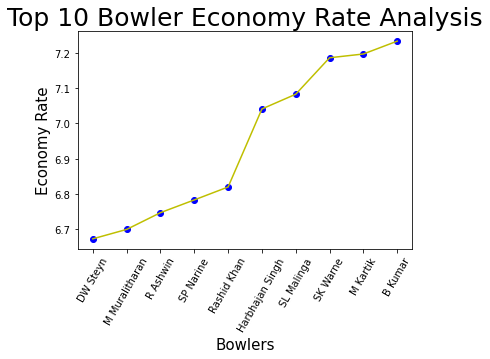

In [177]:
plt.plot(top_10_economy['bowler'],top_10_economy['Economy Rate'],color='y')
plt.scatter(top_10_economy['bowler'],top_10_economy['Economy Rate'],color='b')
plt.xlabel('Bowlers',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('Top 10 Bowler Economy Rate Analysis',size=25)
plt.xticks(rotation=60)

Dale Steyn- The bowler with the best economy rate in IPL

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

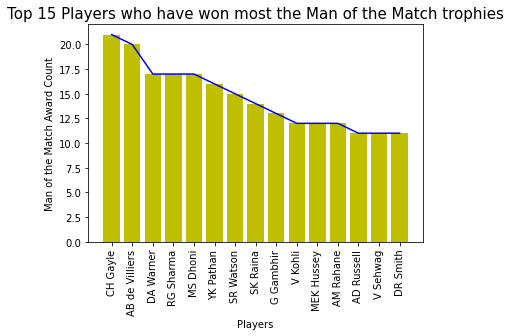

In [180]:
motm=df1.groupby('player_of_match').apply(lambda x:x['player_of_match'].count()).reset_index(name='Man of the Match Awards')
motm_sort=motm.sort_values(by='Man of the Match Awards',ascending=False)
motm_top=motm_sort[0:15]
plt.plot(motm_top['player_of_match'],motm_top['Man of the Match Awards'],color='b')
plt.bar(motm_top['player_of_match'],motm_top['Man of the Match Awards'],color='y')
plt.xlabel('Players')
plt.ylabel('Man of the Match Award Count')
plt.title('Top 15 Players who have won most the Man of the Match trophies',size=15)
plt.xticks(rotation=90)

Most of the 'Match of the Man' award winners have been Batsmen and All rounders. Bowlers are not present in the Top 15 list. 

### Win by Runs/Win by Wickets- Team wise Average

Text(0.5, 1.0, 'Teams Average winning by Runs/Wickets Summary')

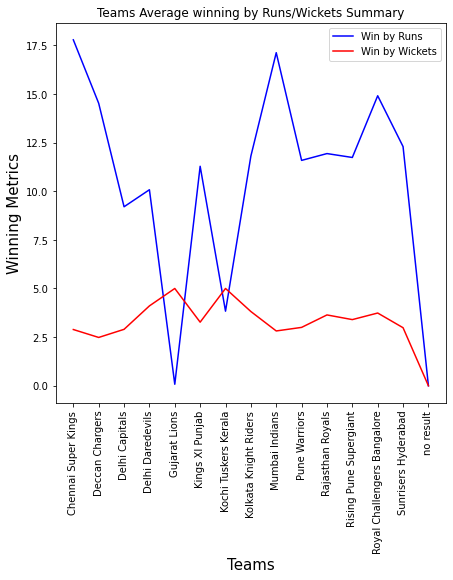

In [181]:
win_runs=df1.groupby('winner').apply(lambda x:np.average(x['win_by_runs'])).reset_index(name='Win By Runs Average')
win_wickets=df1.groupby('winner').apply(lambda x:np.average(x['win_by_wickets'])).reset_index(name='Win By Wickets Average')
plt.figure(figsize=(7,7))
plt.plot(win_runs['winner'],win_runs['Win By Runs Average'],color='b')
plt.plot(win_wickets['winner'],win_wickets['Win By Wickets Average'],color='r')
plt.xlabel('Teams',size=15)
plt.xticks(rotation=90)
plt.ylabel('Winning Metrics',size=15)
plt.legend(['Win by Runs','Win by Wickets'])
plt.title('Teams Average winning by Runs/Wickets Summary')

While most teams have won matches with an average of 10+ runs- only 2 teams have shown values which are less than 5- Gujrat Lions and Kochi Tuskers Kerela. These teams have participated in limited seasons, and their results have not been succesful. But on a surprising note- they have won matches with an average wicket of 5+- which is a good sign in terms of the bowling attack of the team.